In [1]:
import time

import numpy as np
from scipy.stats import norm, uniform
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import Simulate

In [3]:
import sys
sys.path.append('../')

import Agents
import Instruments
import Markets
import Environment
import SimPlotting


In [4]:
def initialize_instruments(Nins_1, Nins_2, prods, stds):

    instruments = []

    #means = mean_productivities
    #stds = std_productivities

    for N in range(Nins_1):
        instrument = Instruments.Universal([prods[0], 0])
        instruments.append(instrument)

    for N in range(Nins_2):
        instrument = Instruments.Universal([0, prods[1]])
        instruments.append(instrument)
        
    return instruments

def _initialize_instruments(Ninstruments, means, stds):
    '''
    Assumes Normal. Initializes Universal Instruments.
    
    Make more general to incude different distributions'''

    instruments = []

    #means = mean_productivities
    #stds = std_productivities

    for N in range(Ninstruments):
        prod_vec = [norm.rvs(loc=mean, scale=std) for mean, std in zip(means, stds)]
        instrument = Instruments.Universal(prod_vec)
        instruments.append(instrument)
        
    return instruments

In [5]:
def initialize_agents(initial_parameters, learning_parameters) -> list:
    
    kwargs = {**initial_parameters, **learning_parameters}
    
    
    Agent_list = [Agents.Agent(**kwargs) for i in range(Nagents)]

    return Agent_list

In [6]:
def initialize_allocation(agent_list, instrument_list):
    
    for agent in agent_list:
        
        random_instrument = random.choice(instrument_list)
        instrument_list.remove(random_instrument)
        
        agent.Ins = random_instrument

Initialize Parameters

In [7]:
Nagents = 10
dt = 1
cg = np.array([1.0, 1.0])
Nproducts = cg.shape[0]

mean_productivities = [5, 5]
std_productivities  = [0, 0]

Ninstruments = Nagents
Nactions = 3 + Nproducts

In [8]:
initial_parameters = {
    'D': np.zeros(Nproducts), #np.ones(Nproducts)*2,
    'cg': cg,
    'M': 10.,
    'n_actions': Nactions
}

learning_parameters = {
    'gamma': 0.5,
    #'gamma': 0.5,
    #'gamma': 0.1,
    'epsilon': 1.0,
    'eps_end': 0.01,
    'eps_dec': 0.01,
    'batch_size': 32,
    'input_dims': [4*Nproducts+1], # 4 product spaces (Q, D, prod_vec, Q_market), 1 scalar (M)
    #'lr':0.001,
    'lr': 0.005,
    'n_actions':Nactions,
}

In [9]:
# Agents
agent_list = initialize_agents(initial_parameters, learning_parameters)
for agent in agent_list:
    agent.Q = np.random.random(Nproducts)*10
    agent.Q0 = np.copy(agent.Q)
    
# Instruments
ratio = 0.5
K1 = int(ratio*Ninstruments)
instrument_list = initialize_instruments(K1, Ninstruments - K1, mean_productivities, std_productivities)
#instrument_list = _initialize_instruments(Ninstruments, mean_productivities, std_productivities)

# Distribution
productbank = Markets.ProductBank(Nproducts, alpha=0.75)

# Initialize Allocaiton
initialize_allocation(agent_list, instrument_list)

# Initialize environment and simulation
env = Environment.Environment(dt, agent_list, instrument_list, productbank)
sim = Simulate.Simulate(env)

In [10]:
Ntimes = 500

s = time.perf_counter()
sim.run_simulation(Ntimes)
e = time.perf_counter()

print(e-s)
print((e-s)/60.)
print((e-s)/60./60.)

31.226753599999938
0.5204458933333324
0.008674098222222206


In [11]:
splt = SimPlotting.SimPlotting(sim)
plt.rcParams['figure.dpi'] = 500

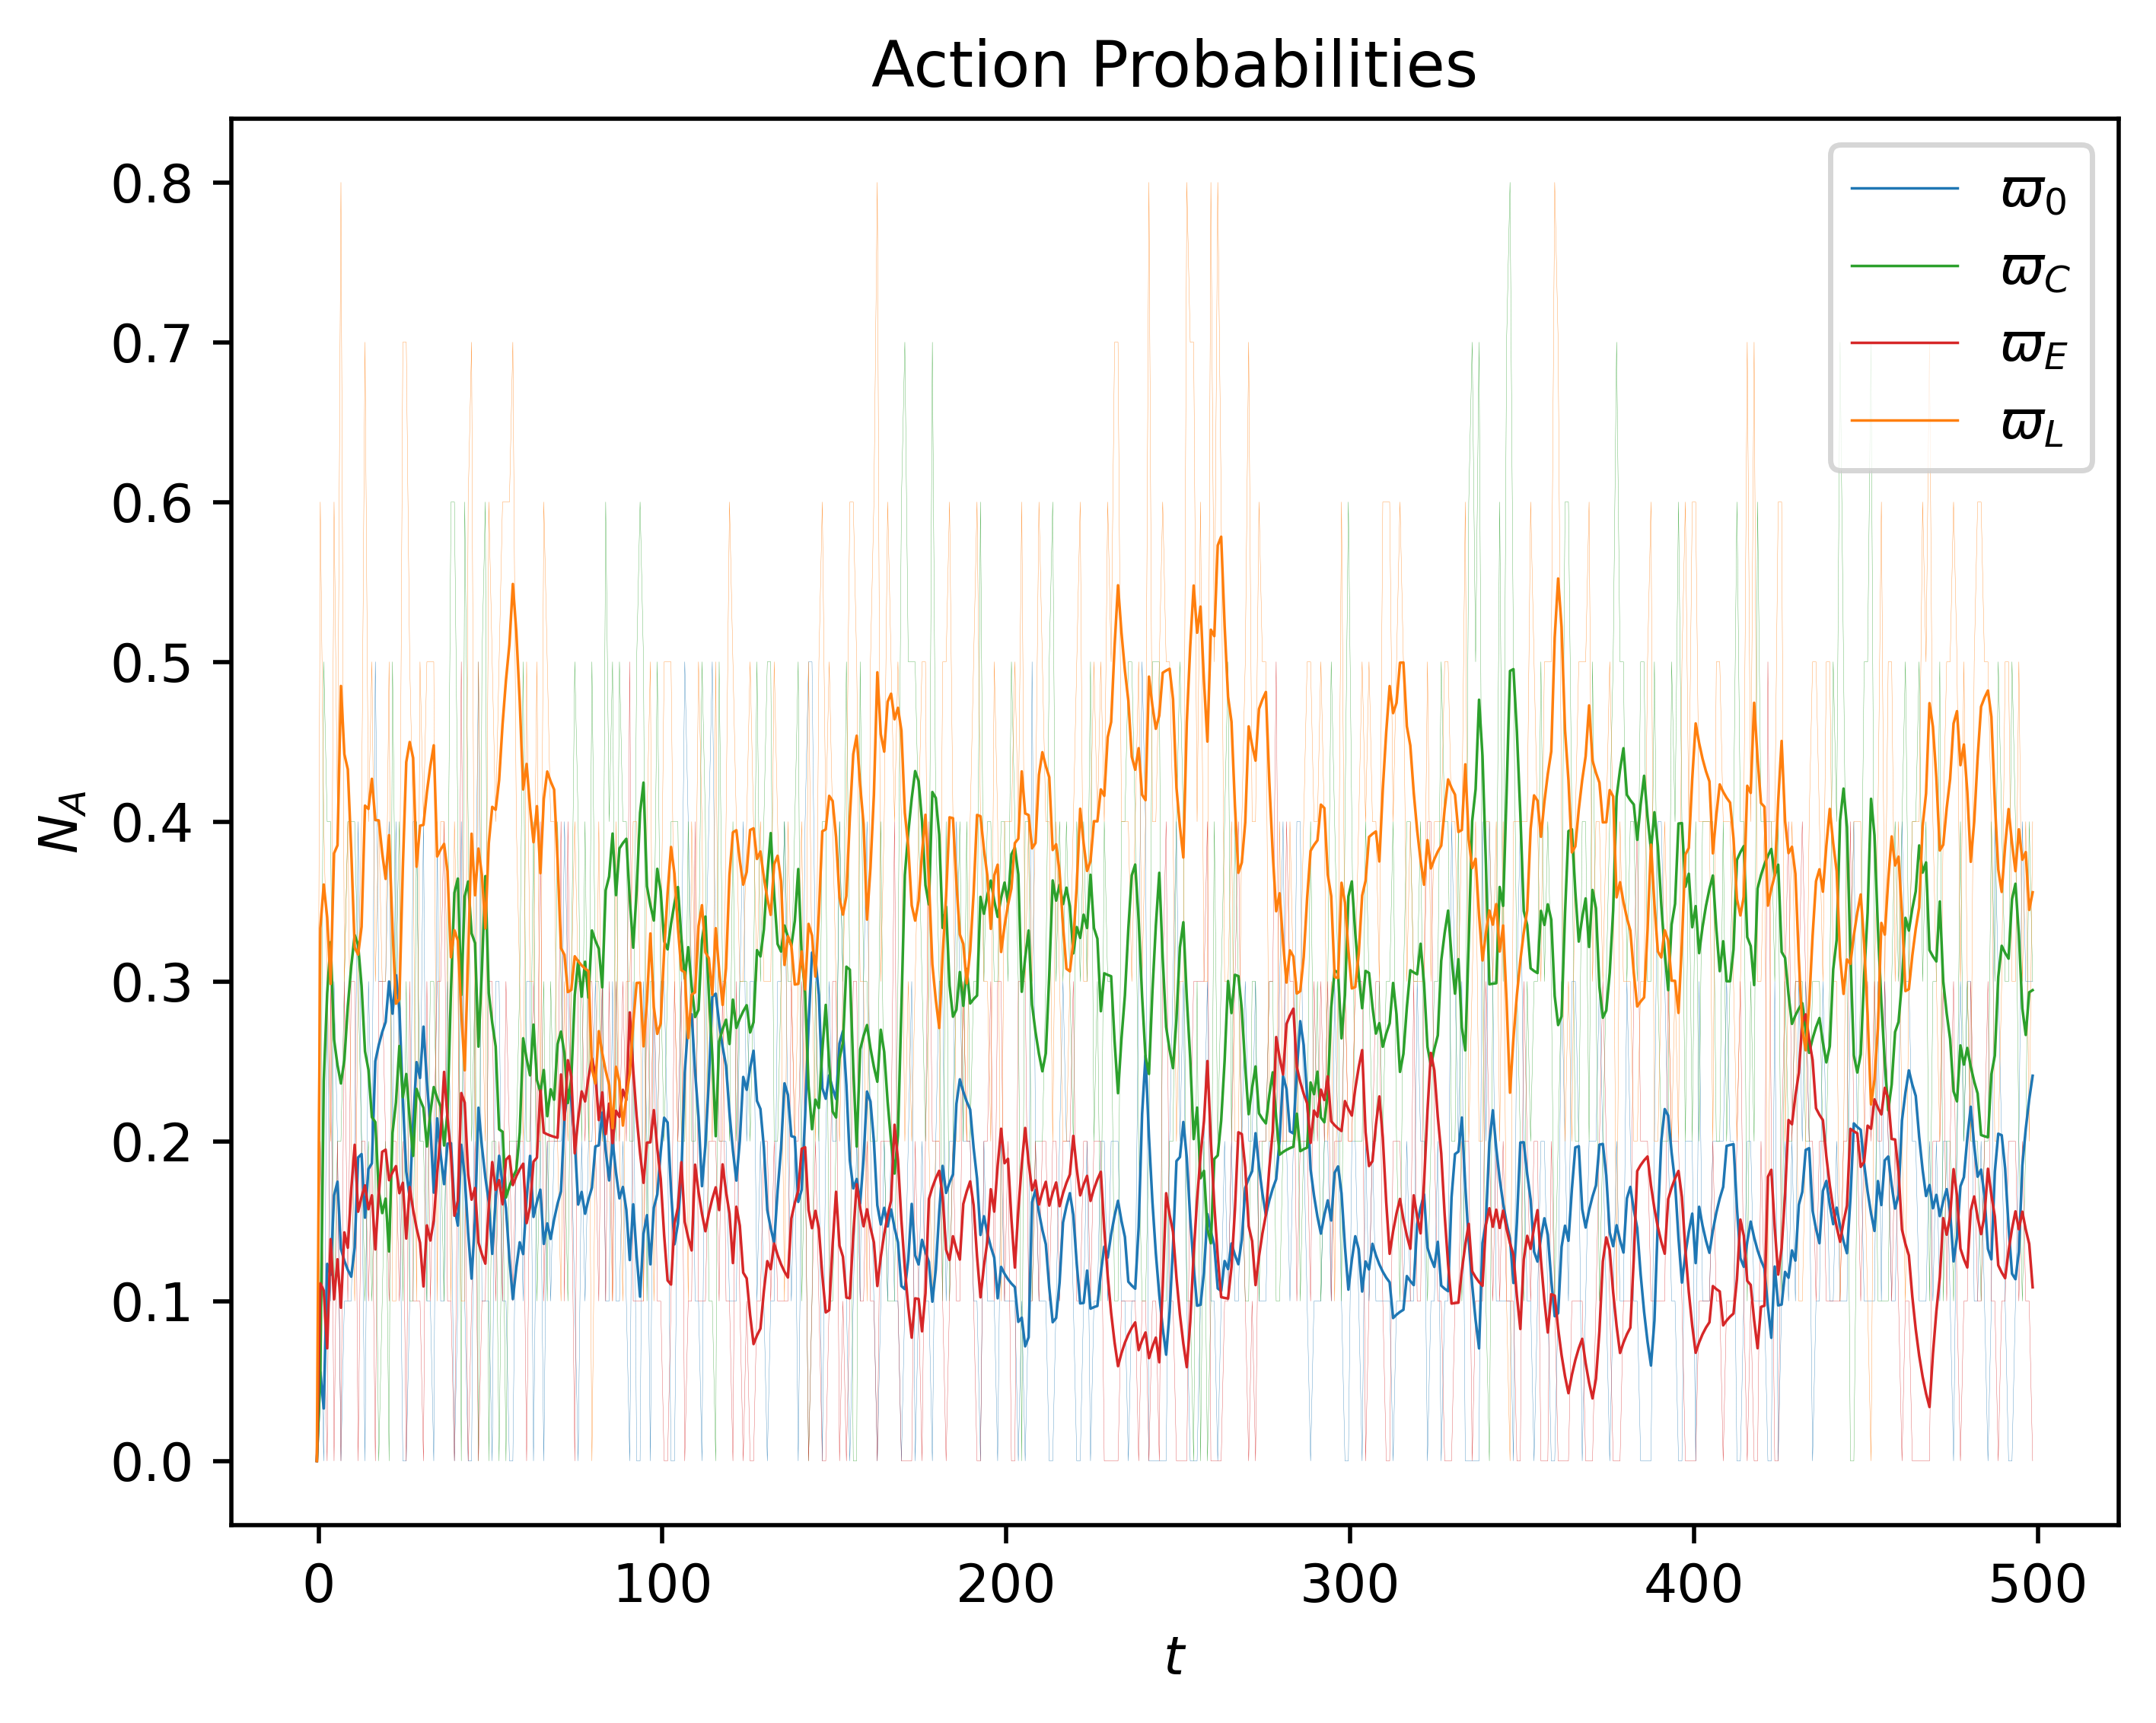

In [12]:
splt.plotA(lw1=0.5, lw2=0.05, ewm=True, alpha=0.2)

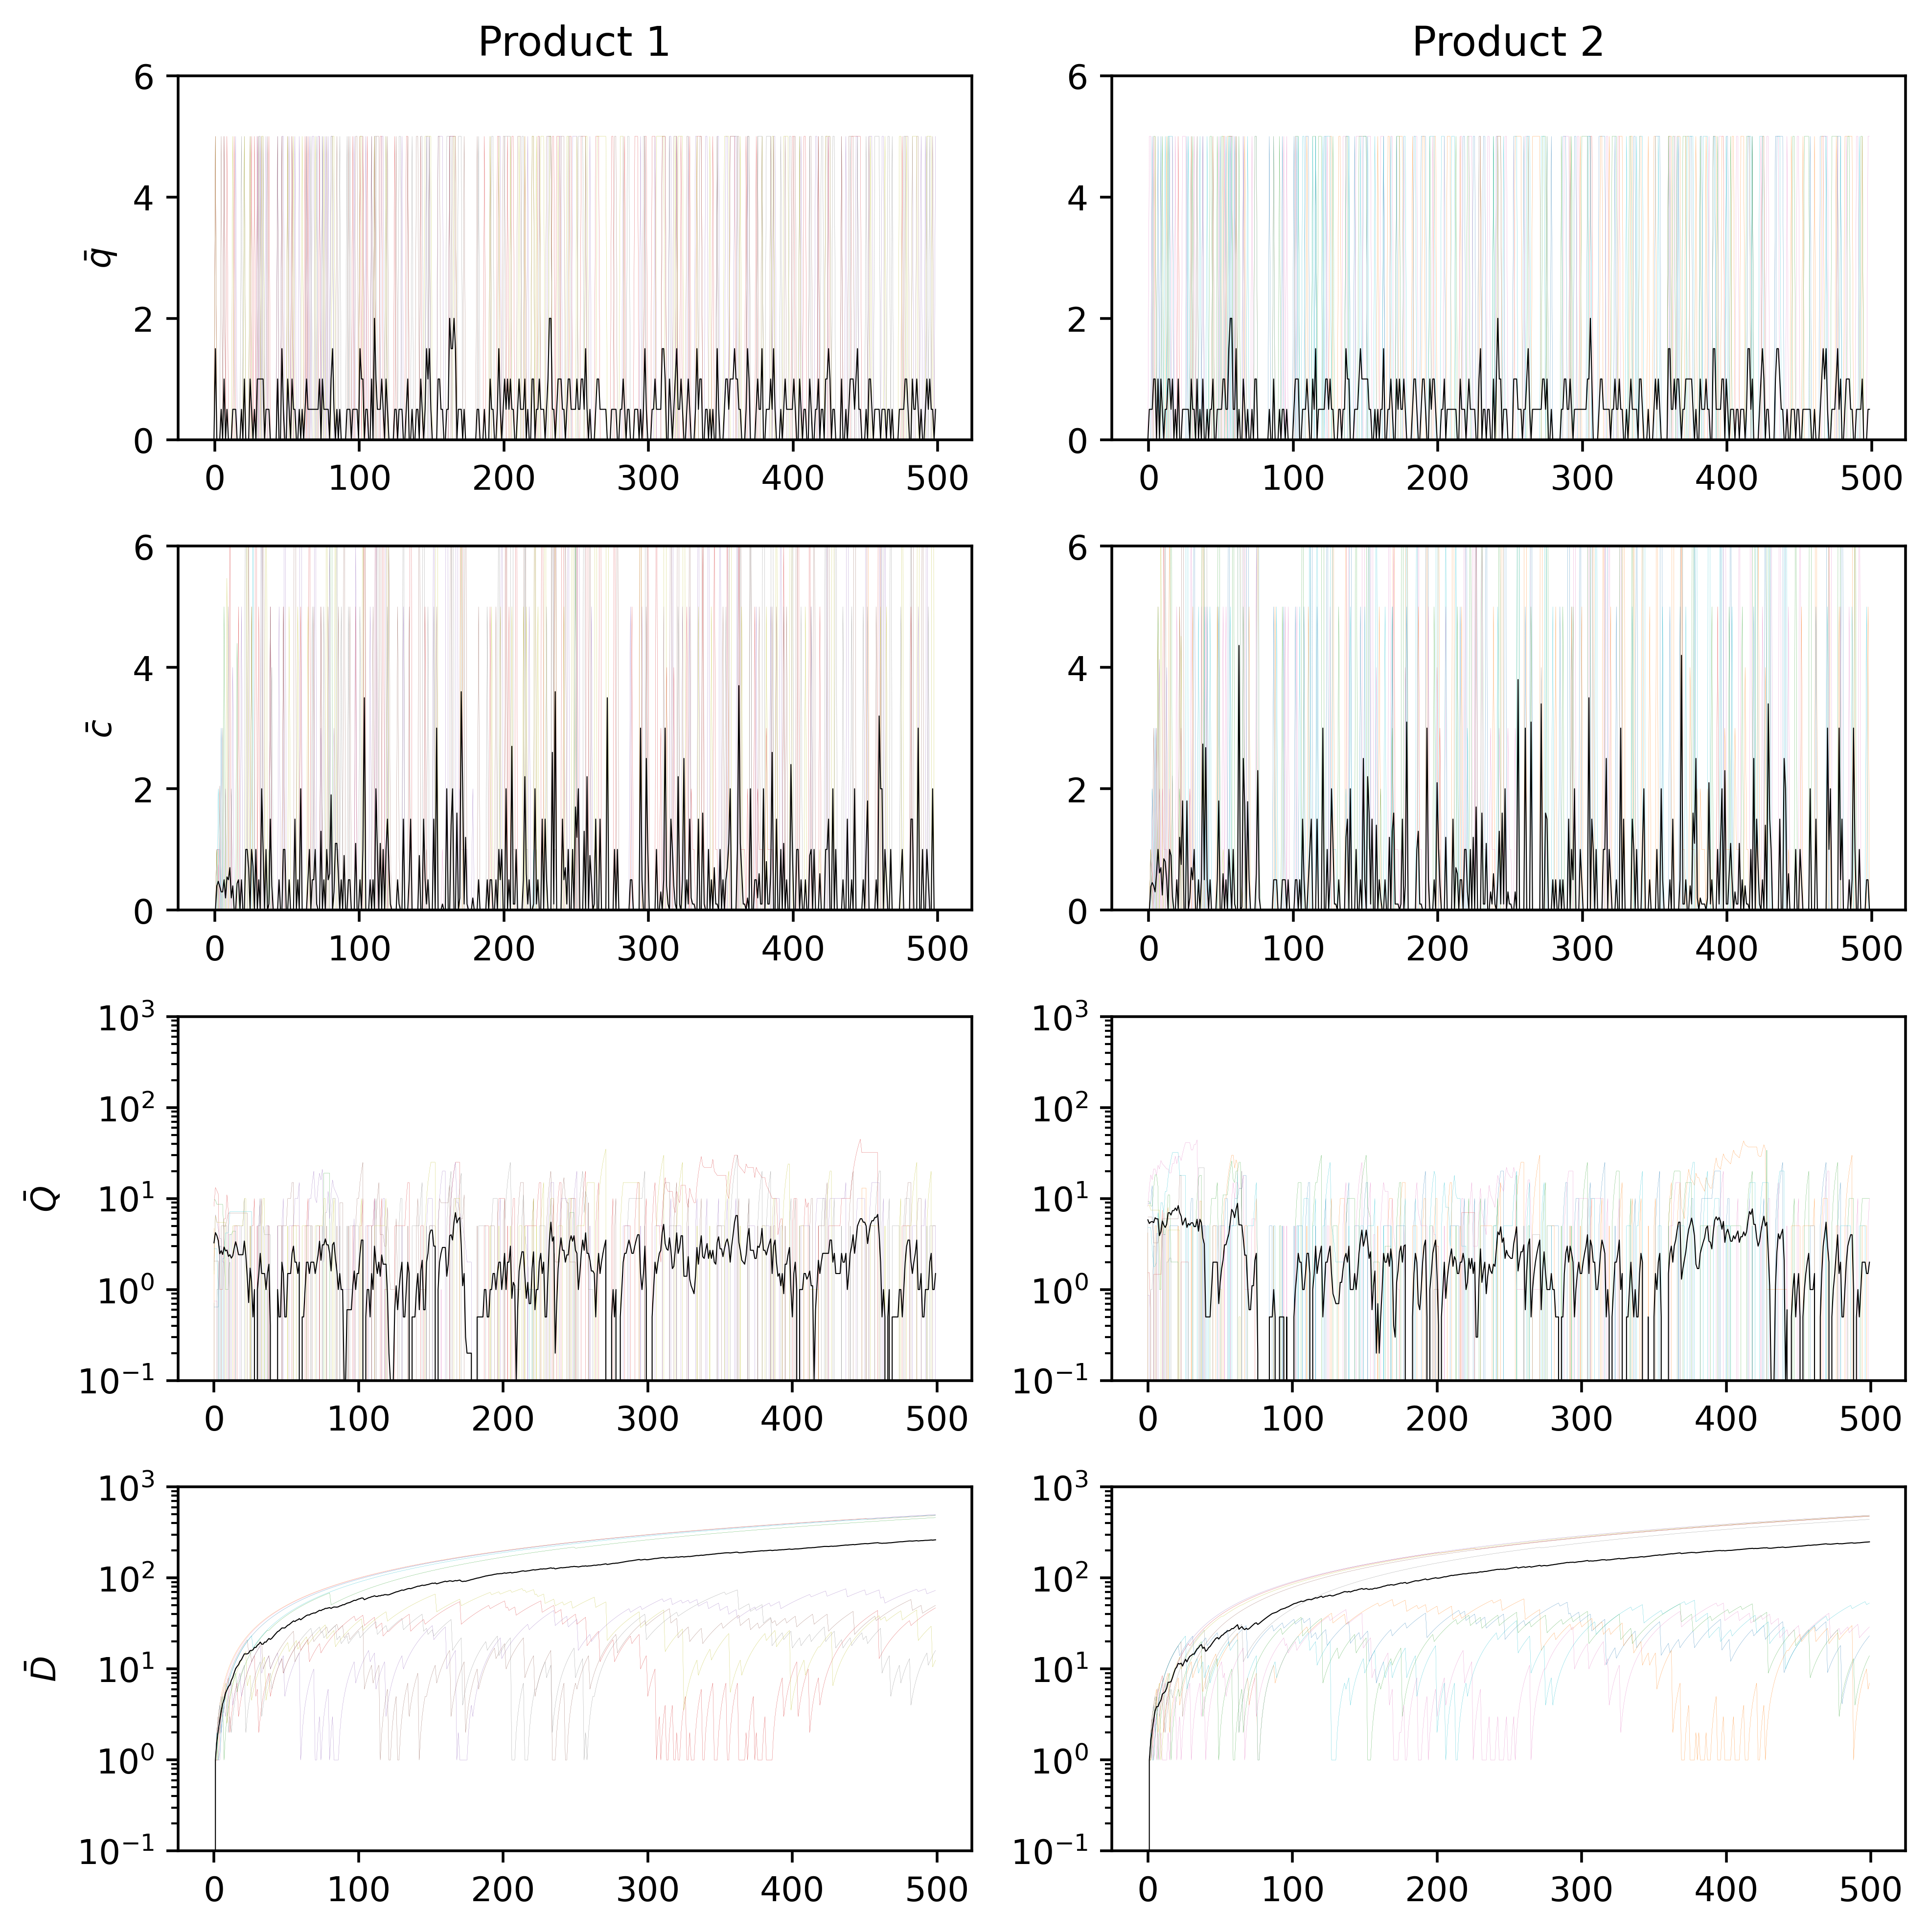

In [13]:
splt.plotQuantities(
    lw1=0.3, 
    lw2=0.05, 
    xmax=10, 
    tight_layout=True, 
    Qlog=True, 
    Dlog=True, 
    qmin=0, 
    qmax=6, 
    cmin=0, 
    cmax=6,
    Qmin = 1e-1,
    Qmax=1e3,
    Dmin=1e-1,
    Dmax=1e3,
)

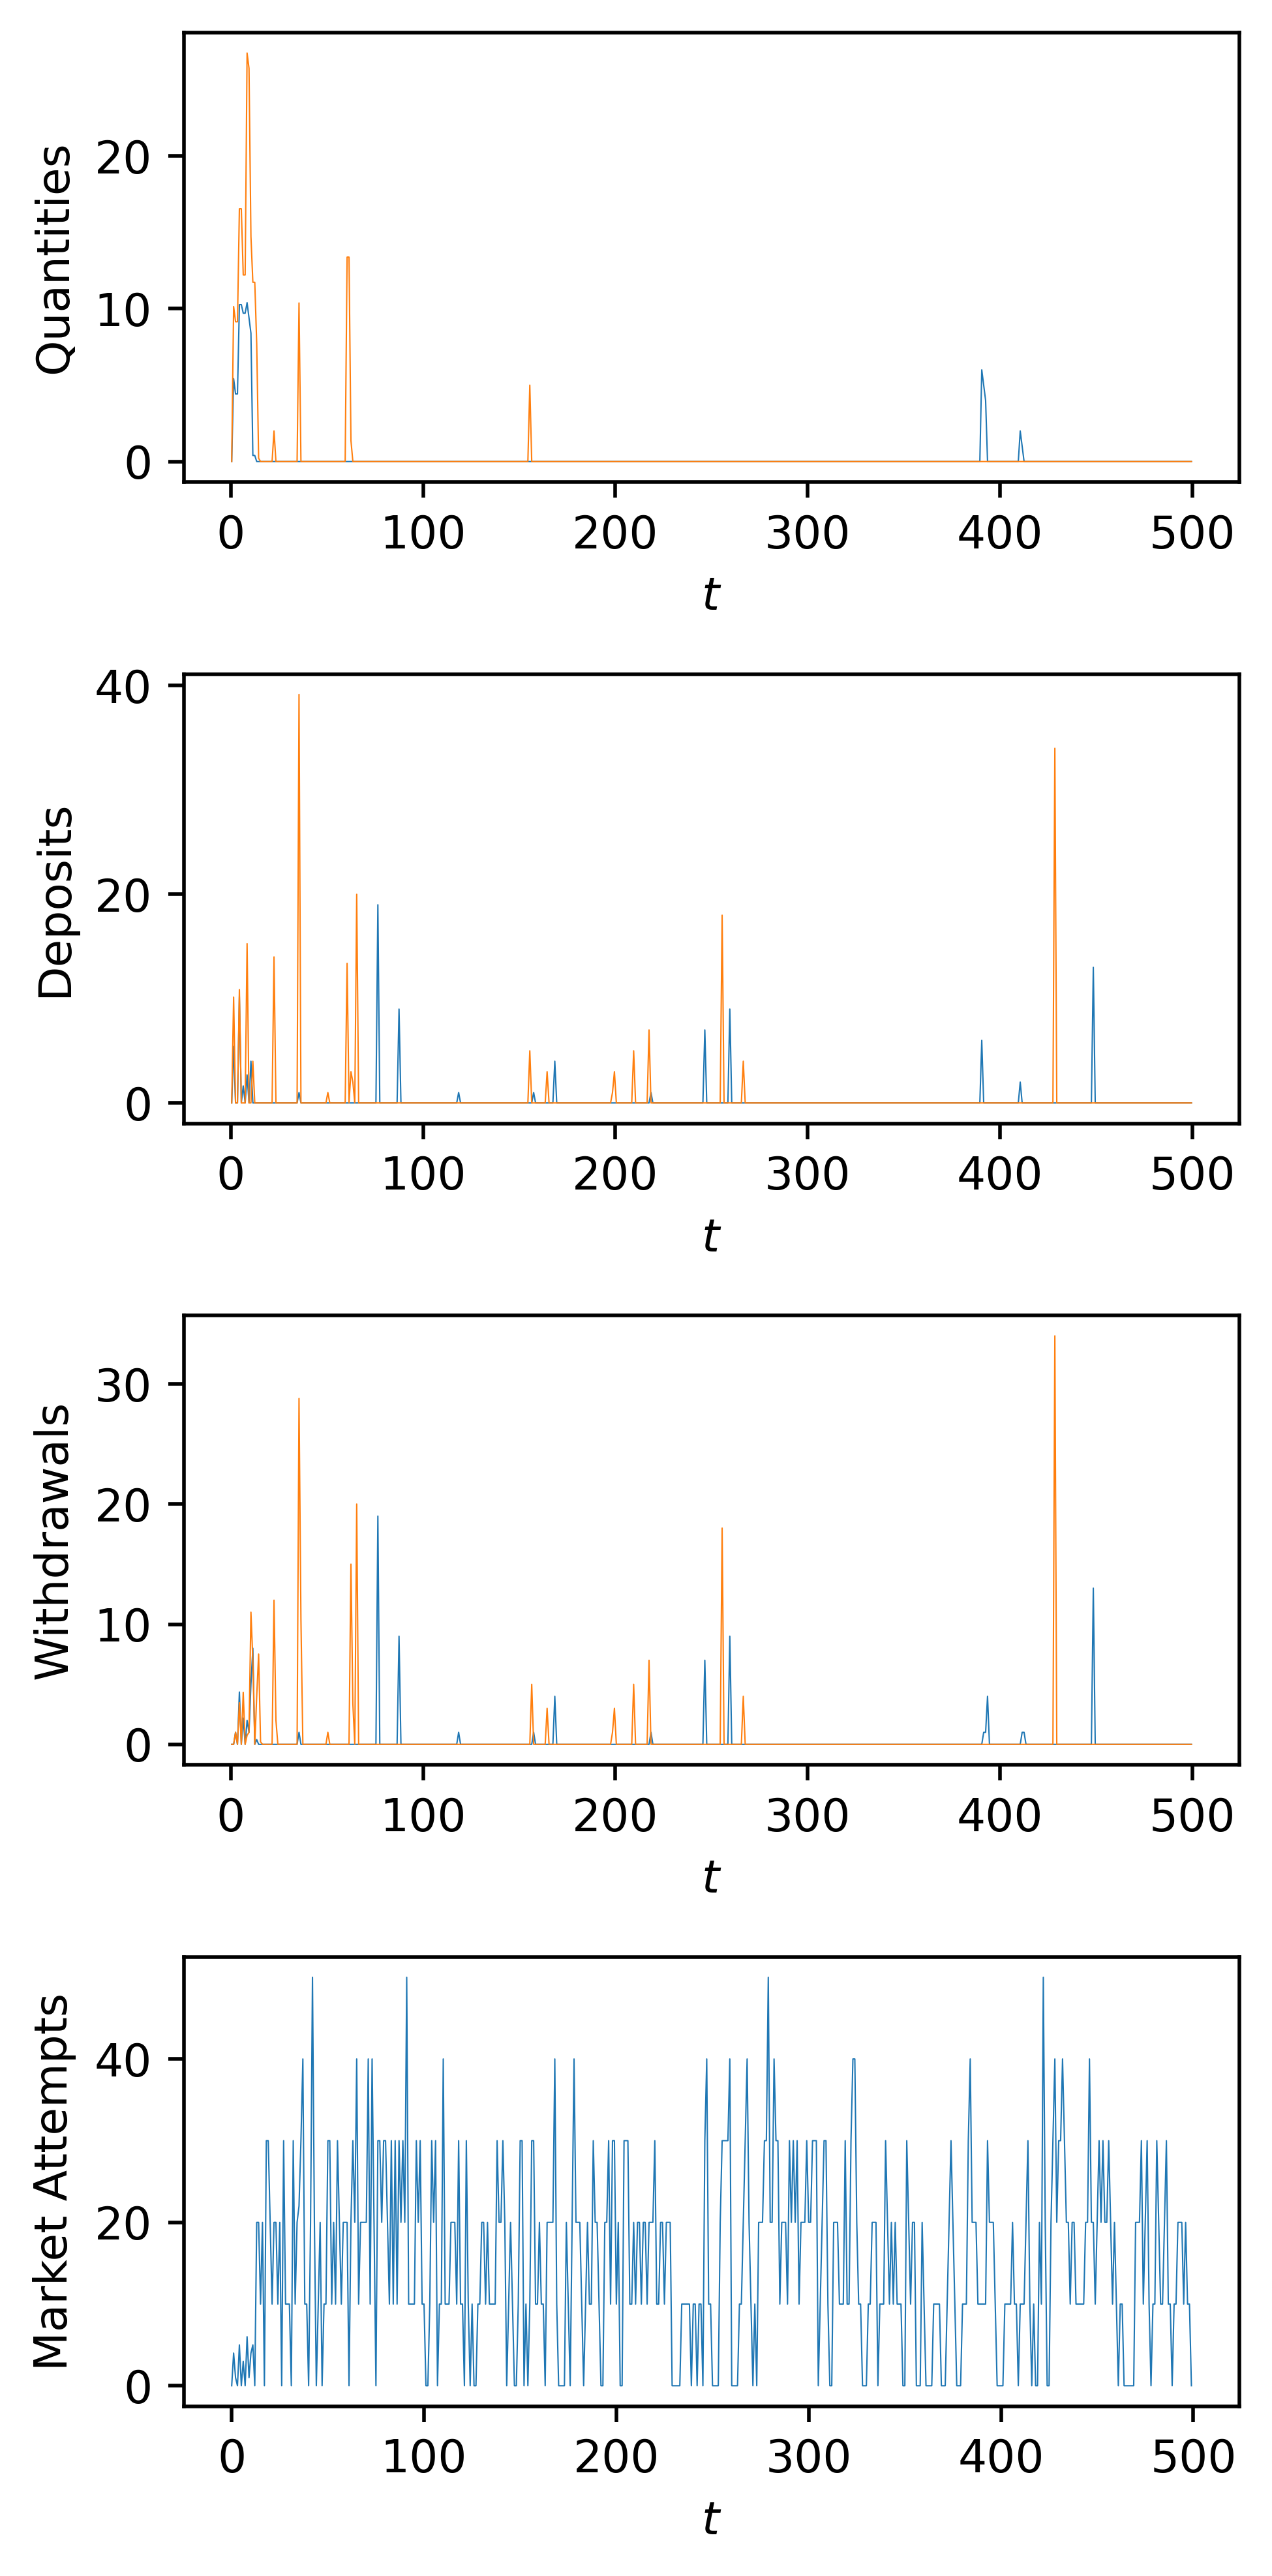

In [14]:
splt.plotProductBank(
    lw1=0.3, 
    lw2=0.05,
    Slog=False,
    Dlog=False,
    Wlog=False,
    Nlog=False,
    tight_layout=True)